In [7]:
from sklearn.datasets import load_iris
dataset = load_iris()
data = dataset.data
target = dataset.target

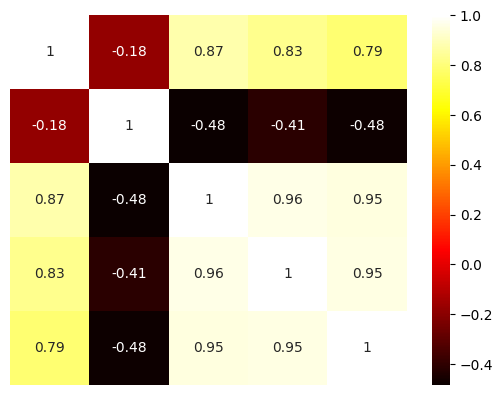

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(data , target , test_size = 0.25)
corr_matrix = np.corrcoef(x_train , y_train , rowvar = False)
seaborn.heatmap(corr_matrix , annot = True, cmap = 'hot' , cbar = True)
plt.axis('off')
plt.show()

# Outcomes of the corr matrix
The columns in the correlation matrix are sepal length , sepal width , petal length , petal width , target_values

On observing the last row we can see that how the features are correlated to the output (High degree of correlation with petal length and petal width) , We can also observe that there is a high degree of correlation between petal length and petal width

In [9]:
dataset.feature_names , dataset.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

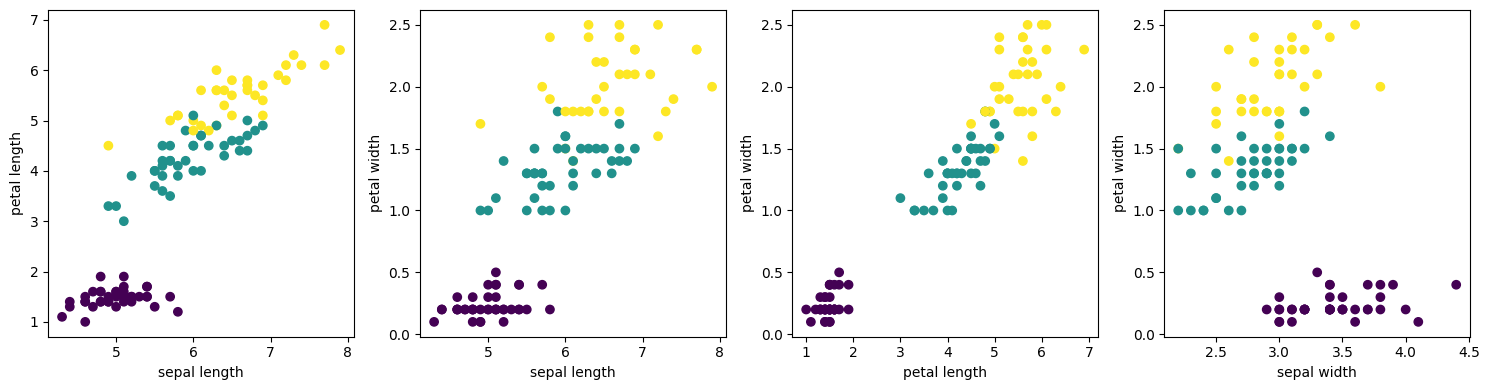

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].scatter(x_train[:, 0], x_train[:, 2], c=y_train.astype(np.int64))
axs[0].set_xlabel('sepal length')
axs[0].set_ylabel('petal length')

axs[1].scatter(x_train[:, 0], x_train[:, 3], c=y_train.astype(np.int64))
axs[1].set_xlabel('sepal length')
axs[1].set_ylabel('petal width')

axs[2].scatter(x_train[:, 2], x_train[:, 3], c=y_train.astype(np.int64))
axs[2].set_xlabel('petal length')
axs[2].set_ylabel('petal width')

axs[3].scatter(x_train[:, 1], x_train[:, 3], c=y_train.astype(np.int64))
axs[3].set_xlabel('sepal width')
axs[3].set_ylabel('petal width')

plt.tight_layout()
plt.show()

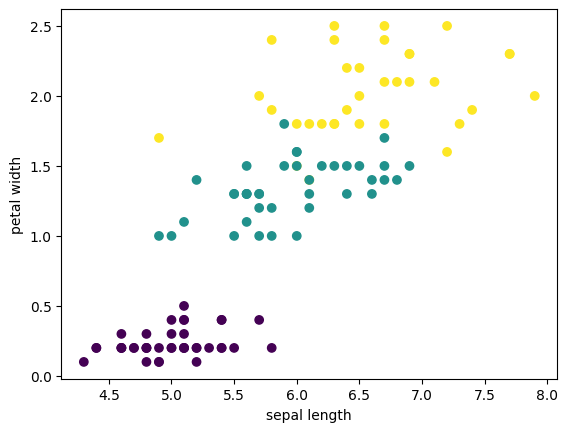

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}])

In [11]:
x_new_train = x_train[: , [0, 3]]

plt.scatter(x_new_train[: , 0] , x_new_train[: , 1] , c = y_train)
plt.ylabel('petal width')
plt.xlabel('sepal length')
plt.show()

# as the data is linearly seperable we can use any Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_clf = LogisticRegression(random_state = 42)
params = [{'C' : [0.001, 0.01 , 0.1 , 1 , 10 , 100]}]

model = GridSearchCV(log_clf , params , verbose = 0)
model.fit(x_new_train , y_train)

The training accuracy of best model is: 0.9466403162055336


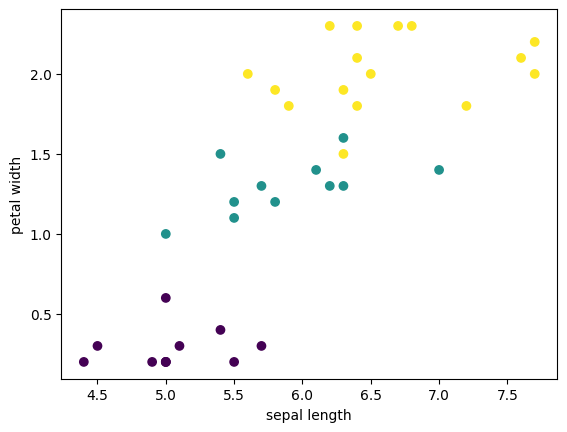

The test accuracy is : 0.9736842105263158


In [12]:
print(f"The training accuracy of best model is: {model.best_score_}")

best_model = model.best_estimator_

# testing over test data
from sklearn.metrics import accuracy_score
x_new_test = x_test[: , [0,3]]

predicted = best_model.predict(x_new_test)
score = accuracy_score(predicted , y_test.astype(np.int64))

plt.scatter(x_new_test[: , 0] , x_new_test[: , 1] , c = y_test)
plt.ylabel('petal width')
plt.xlabel('sepal length')
plt.show()
print(f'The test accuracy is : {score}')

## Conclusion
We can see that as petal length and width are highly correlated to each other we can consider any one of them and also from observation we can see that sepal length and petal width has a better linear seperation compared to others so we can consider these two features and try to classify using simple Linear model